## Food/Diet Recommender System

#### Group04

**Tutorial section: TT5L**

| | Student ID     | Student Name                |
|--:|:-------------|:---------------------------:|
| 1 | 1201103207   | Melody Koh Si Jie           | 
| 2 | 1211103427   | Law Chin Keat               |
| 3 | 1211102976   | Lee Le Xuan                 | 
| 4 | 1211200755   | Wendy Tan Wei Wei           | 

## 1.0 Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve

## 2.0 Exploring the data

In [2]:
df = pd.read_csv('data/RAW_recipes.csv')
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [3]:
df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')

In [4]:
df.dtypes

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

In [5]:
df.shape

(231637, 12)

In [6]:
df.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000


## 3.0 Data Preprocessing

### 3.1 Handling Missing Values

In [7]:
df.isnull().sum().sum()

4980

In [8]:
(df.isnull().sum()/(len(df)))*100

name              0.000432
id                0.000000
minutes           0.000000
contributor_id    0.000000
submitted         0.000000
tags              0.000000
nutrition         0.000000
n_steps           0.000000
steps             0.000000
description       2.149484
ingredients       0.000000
n_ingredients     0.000000
dtype: float64

There are 4980 rows which has at least one null value, it seems to be a lot, but 4980/231637 = 0.02 * 100 which is only 2.15%. Now let's try to look at the missing value and analyse them

In [9]:
df.isnull().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

We can observe that `name` column has only one row of missing data and `description` column has 4979 rows of missing values. 

In [10]:
# filter on column name which row is having null value
name_null = df['name'].isnull()
df[name_null]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
721,NaN,368257,10,779451,2009-04-27,"['15-minutes-or-less', 'time-to-make', 'course...","[1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]",6,"['in a bowl , combine ingredients except for o...",-------------,"['lemon', 'honey', 'horseradish mustard', 'gar...",10


We can noticed that row 721 contains the missing value under `name` column, but based on the ingredients and steps, we know that it is a salad dressing, thus we fill in the value manually.

In [11]:
df.fillna({'name': 'salad dressing'}, inplace=True)
df.loc[721]

name                                                 salad dressing
id                                                           368257
minutes                                                          10
contributor_id                                               779451
submitted                                                2009-04-27
tags              ['15-minutes-or-less', 'time-to-make', 'course...
nutrition             [1596.2, 249.0, 155.0, 0.0, 2.0, 112.0, 14.0]
n_steps                                                           6
steps             ['in a bowl , combine ingredients except for o...
description                                           -------------
ingredients       ['lemon', 'honey', 'horseradish mustard', 'gar...
n_ingredients                                                    10
Name: 721, dtype: object

Next, we need to address the column with the highest number of missing values, `description`. Taking into account the description of `description` column provided by Kaggle, we know that column `description` is just the user-provided description of the recipe that are not essential for our model building, thus we can simply drop it.

In [12]:
df.drop(['description'], axis=1, inplace=True)

In [13]:
# every missing values is now handled successfully
df.isnull().sum()

name              0
id                0
minutes           0
contributor_id    0
submitted         0
tags              0
nutrition         0
n_steps           0
steps             0
ingredients       0
n_ingredients     0
dtype: int64

### 3.2 Handling Duplicated values

In [14]:
duplicate_data = df.duplicated()
df[duplicate_data]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients


we can see that there is no any duplicated data, which is great

## 4.0 Data Mining

### 4.1 Feature Engineering

Next, we will manually engineer some additional features out of the original dataset, the `nutrition` column provides information such as calories, total FAT, sugar, sodium, protein and saturated fat which could be beneficial for our model.

In [15]:
# split the 'nutrition' column into separate columns for each nutrient
df[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = df.nutrition.str.split(",",expand=True) 

In [16]:
# Remove '[' from 'calories' values and ']' from 'carbohydrates (PDV)' values
df['calories'] = df['calories'].apply(lambda x: x.replace('[',''))
df['carbohydrates'] = df['carbohydrates'].apply(lambda x: x.replace(']',''))

In [17]:
# convert columns from object to float datatype
df[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = df[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']].astype('float')
df.dtypes

name               object
id                  int64
minutes             int64
contributor_id      int64
submitted          object
tags               object
nutrition          object
n_steps             int64
steps              object
ingredients        object
n_ingredients       int64
calories          float64
total fat         float64
sugar             float64
sodium            float64
protein           float64
saturated fat     float64
carbohydrates     float64
dtype: object

In [18]:
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0


#### Categorical column

Now that we have extracted out the unique values for our `nutrition` column, we can safely dropped that column, but before that, we introduce a new column called `food types` to categorize the food items into various categories

In [19]:
# add new column named as 'food types'
df['food types'] = np.nan
df['food types'] = df['food types'].astype('str')

In [20]:
# categorize food into Vegan if it does not contain eggs, and Non-Vegan if it contain eggs
for i in df['ingredients'].index:
    if('eggs' not in df.loc[i, 'ingredients']):
        if('ice-cream' in df.loc[i, 'ingredients'] or 'chocolate' in df.loc[i, 'ingredients'] or 'cookies' in df.loc[i, 'ingredients']):
            df.loc[i, 'food types']='Vegan dessert'
    elif('eggs' in df.loc[i, 'ingredients']):
        if('ice-cream' in df.loc[i, 'ingredients'] or 'chocolate' in df.loc[i, 'ingredients'] or 'cookies' in df.loc[i, 'ingredients']):
            df.loc[i, 'food types']='Non-Vegan dessert'

In [21]:
# categorize food into healthy if it is between 20 to 300 calories
for i in df.index:
    if(df.loc[i, 'food types']!='Vegan dessert' and df.loc[i, 'food types']!='Non-Vegan dessert' and 20<df.loc[i, 'calories']<300):
        df.loc[i, 'food types']='Healthy'

In [22]:
for i in df.index:
    if(df.loc[i, 'food types']!='Vegan dessert' and df.loc[i, 'food types']!='Non-Vegan dessert' and df.loc[i, 'food types']!='Healthy'):
        if('chicken' in df.loc[i, 'ingredients'] or 'eggs' in df.loc[i, 'ingredients'] or'ham' in df.loc[i, 'ingredients'] or 'pepperoni' in df.loc[i, 'ingredients'] ):
            df.loc[i, 'food types']='Non-Vegan'

In [23]:
for i in df.index:
    if(df.loc[i, 'food types']!='Vegan dessert' and df.loc[i, 'food types']!='Non-Vegan dessert' and df.loc[i, 'food types']!='Healthy' and df.loc[i, 'food types']!='Non-Vegan'):
        df.loc[i, 'food types']='Vegan'

In [24]:
df['food types'].value_counts()

food types
Healthy              100579
Vegan                 70416
Non-Vegan             45948
Vegan dessert          9532
Non-Vegan dessert      5162
Name: count, dtype: int64

Next, we will perform one hot encoding for each of the unique values in food type.

In [25]:
# one-hot encoding for food types
types = pd.get_dummies(df['food types'])

In [26]:
df = pd.concat([df, types], axis=1)
df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,ingredients,...,sodium,protein,saturated fat,carbohydrates,food types,Healthy,Non-Vegan,Non-Vegan dessert,Vegan,Vegan dessert
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",...,0.0,2.0,0.0,4.0,Healthy,True,False,False,False,False
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",...,17.0,22.0,35.0,1.0,Healthy,True,False,False,False,False
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",...,48.0,39.0,27.0,5.0,Healthy,True,False,False,False,False
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",...,2.0,14.0,8.0,20.0,Vegan,False,False,False,True,False
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",...,23.0,3.0,0.0,28.0,Vegan,False,False,False,True,False


### 4.1 Drop unnecessary column

Before this we have dropped the column `description`, lets analyse on other columns and see if we could drop any other unnecessary column for our model building later

In [27]:
df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'ingredients', 'n_ingredients',
       'calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat',
       'carbohydrates', 'food types', 'Healthy', 'Non-Vegan',
       'Non-Vegan dessert', 'Vegan', 'Vegan dessert'],
      dtype='object')

We could drop the following columns:
1. `contributor_id`, as this column is simply just the user id who submitted the recipe which could not provide any meaningful data for our model building
2. `submitted`, this column indicates the date recipe was submitted which is also unnecessary undoubtedly
3. `nutrition`, we have extracted out the features before this, so we can safely dropped this column.

In [28]:
df.drop(['id', 'contributor_id', 'submitted', 'nutrition'], axis=1, inplace=True)
df.head()

,name,minutes,tags,n_steps,steps,ingredients,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat,carbohydrates,food types,Healthy,Non-Vegan,Non-Vegan dessert,Vegan,Vegan dessert
0,arriba baked winter squash mexican style,55,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0,Healthy,True,False,False,False,False
1,a bit different breakfast pizza,30,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...","['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,1.0,Healthy,True,False,False,False,False
2,all in the kitchen chili,130,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...","['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,5.0,Healthy,True,False,False,False,False
3,alouette potatoes,45,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,20.0,Vegan,False,False,False,True,False
4,amish tomato ketchup for canning,190,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,28.0,Vegan,False,False,False,True,False


## 5.0 Data Visualization

### 5.1 Pearson Correlation Heatmap

Next, we would plot a quick correlational analysis to examine the relationship between the numerical attributes by using seaborn heatmap.

In [29]:
cor = df.iloc[:, 6:13].corr()
display(cor) 

,n_ingredients,calories,total fat,sugar,sodium,protein,saturated fat
n_ingredients,1.000000,0.061429,0.078717,-0.003078,0.037065,0.157753,0.060340
calories,0.061429,1.000000,0.600259,0.864306,0.170535,0.486858,0.548207
total fat,0.078717,0.600259,1.000000,0.164644,0.155745,0.509336,0.870711
sugar,-0.003078,0.864306,0.164644,1.000000,0.084418,0.186464,0.166705
sodium,0.037065,0.170535,0.155745,0.084418,1.000000,0.225052,0.144746
protein,0.157753,0.486858,0.509336,0.186464,0.225052,1.000000,0.491322
saturated fat,0.060340,0.548207,0.870711,0.166705,0.144746,0.491322,1.000000


<Axes: >

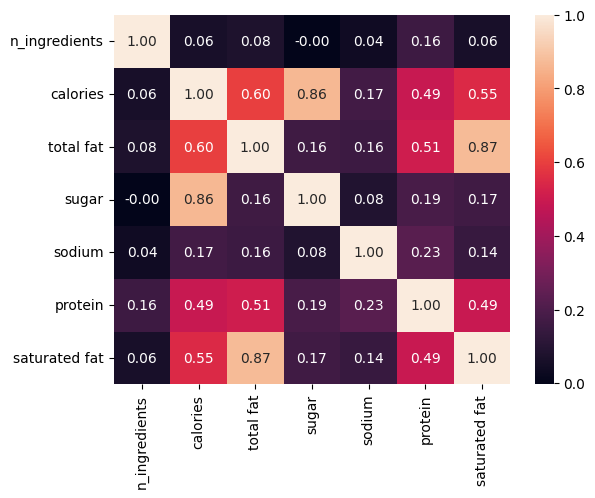

In [30]:
# plot correlation heatmap
sns.heatmap(cor, annot=True, fmt=".2f")

From the heatmap, we observe the following key correlations:
1. Saturated fat and total fat exhibit the highest correlation, with a coefficient of 0.87. This indicates a strong linear relationship between them.
2. The second highest correlation is 0.86, observed between sugar and calories. This suggests a significant linear relationship, where higher sugar content is closely associated with an increase in calorie count.

Following that, we would define the functions for visualization later on.

In [31]:
#Boxplot
def boxplot(variable, axes, data):
    sns.boxplot(y=variable, data=data,ax=axes)
    axes.set_title(f'Distribution of {variable}')

#KDE Plot
def kdeplot(variable, color, ax):
    ax.set_title(f'Distribution of {variable}')
    if variable in ['calories', 'total fat', 'sugar', 'sodium', 'protein', 'saturated fat', 'carbohydrates']:
        sns.kdeplot(np.log(df[variable][df[variable] > 0]), fill=True, color=color, ax=ax)
    else:
        sns.kdeplot(df[variable], fill=True, color=color, ax=ax)

#scatterplot
def scatterplot(x, y, ax):
    sns.scatterplot(x=df[x], y=df[y], ax=ax, hue=df['food types']).set(title=f'{x} vs {y}')

### 5.2 Univariate Analysis

Now we would visualize our numerical attributes with a KDE Plot to understand the data distribution.

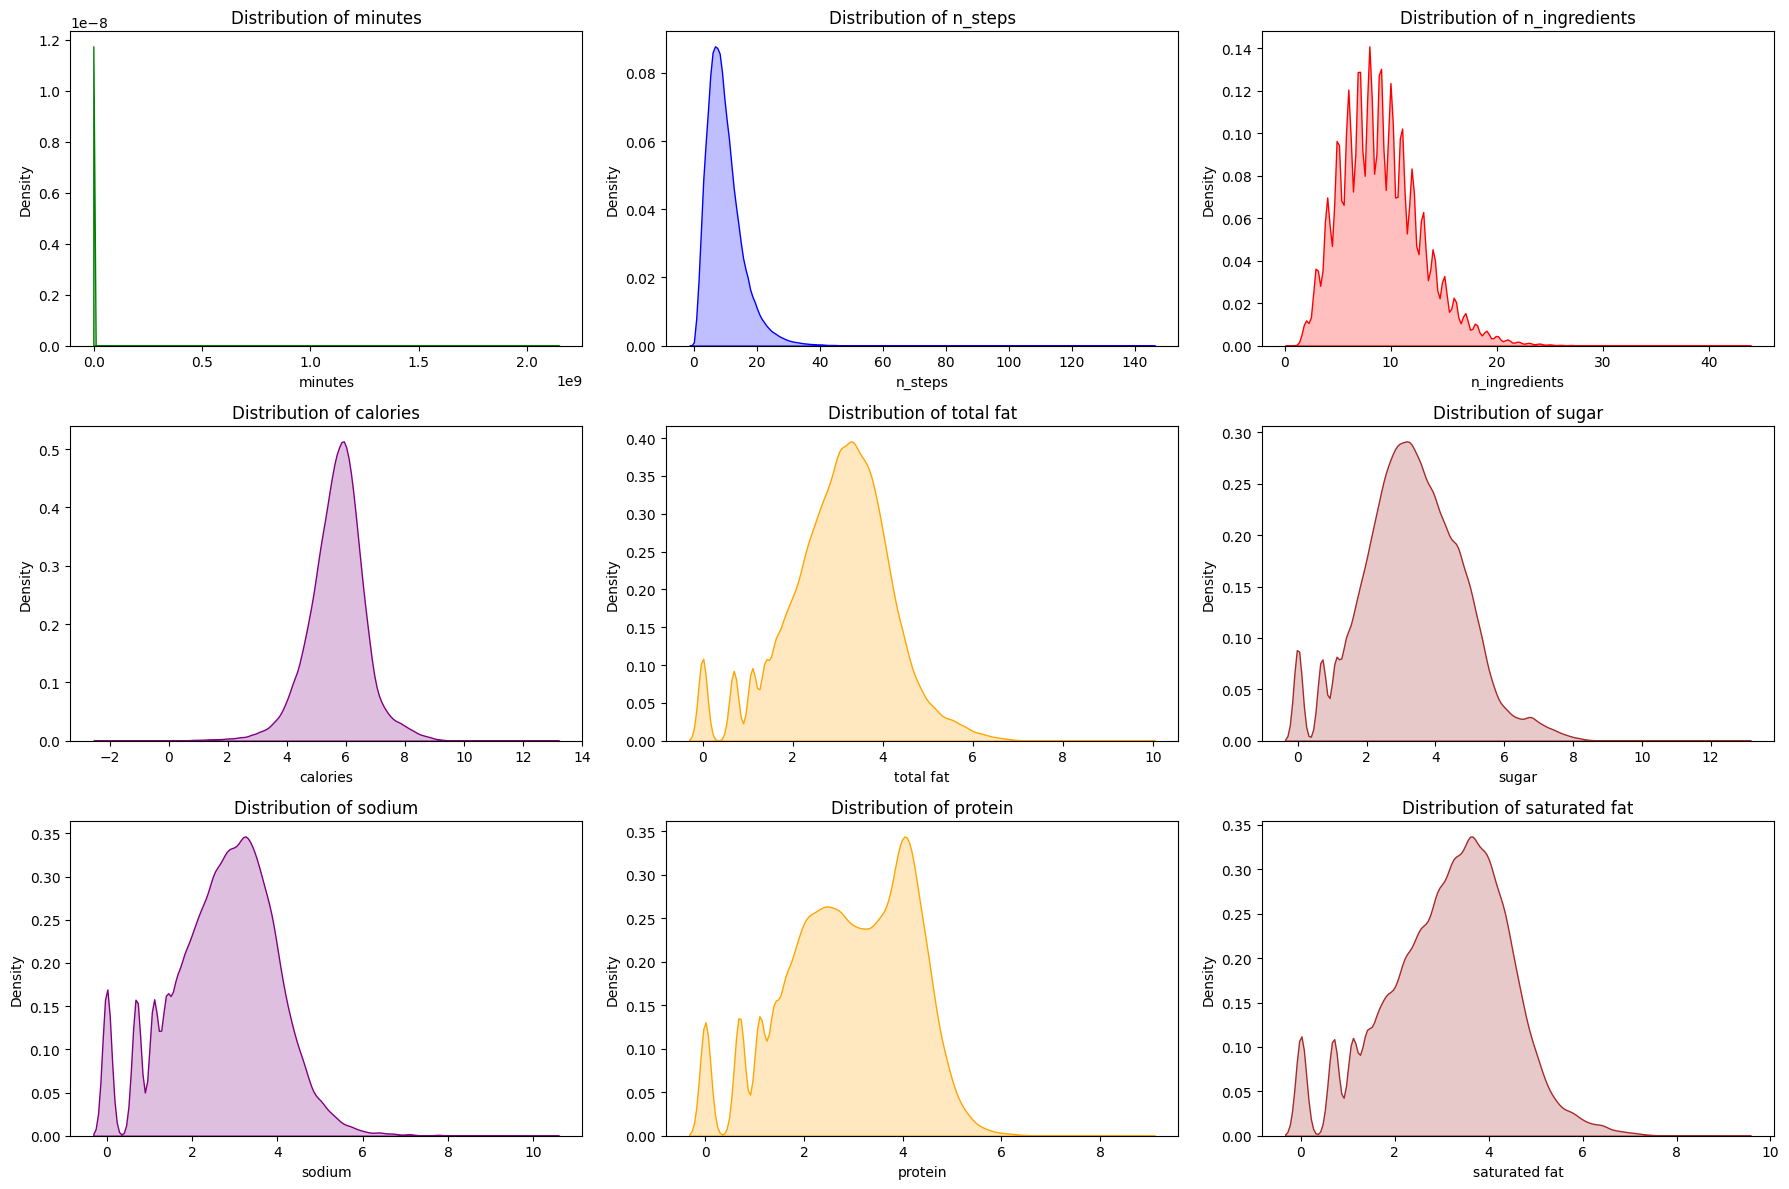

In [32]:
# KDE Plot Visualizations
fig, ax = plt.subplots(3, 3, figsize=(18, 12))
ax = ax.flatten()

variables = df.select_dtypes(include=['int64', 'float64']).columns

# Colors for each plot (optional, you can choose any other colors or a single color)
colors = ['green', 'blue', 'red', 'purple', 'orange', 'brown', 'purple', 'orange', 'brown']

# Loop through variables and axes to create the KDE plots
for i, (variable, color) in enumerate(zip(variables, colors)):
    kdeplot(variable, color, ax[i])

plt.tight_layout()
plt.show()

Insights:
1. calories, total fat, sugar, sodium and saturated fat exhibits a gaussian(normal) distribution.
2. n_steps and n_ingredients are right skewed.

Next, we would plot a pie chart based on the unique values in `food types` column.

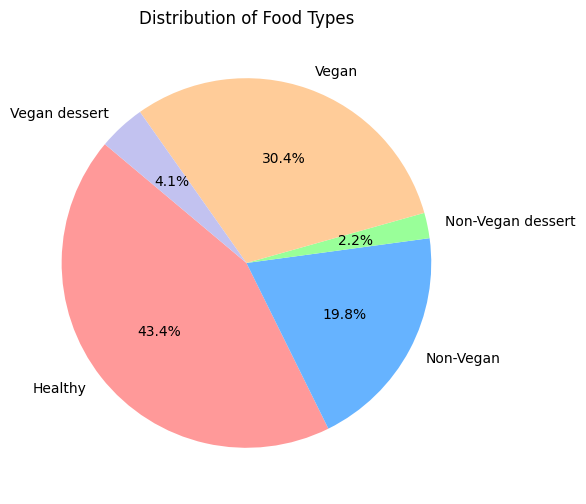

In [33]:
totals = types.sum()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(totals, labels=totals.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'])
plt.title('Distribution of Food Types')
plt.show()

### Removing Outliers

In [34]:
cols = ['sodium', 'protein', 'saturated fat', 'carbohydrates']
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    # loop and perform median imputation
    df = df[(df[col] >= lower_tail) & (df[col] <= upper_tail)]

### 5.3 Bivariate Analysis

Next, we will conduct a bivariate analysis to explore the correlation between two numerical attributes. We'll plot the four pairs with the highest correlation, as indicated by the heatmap generated earlier.

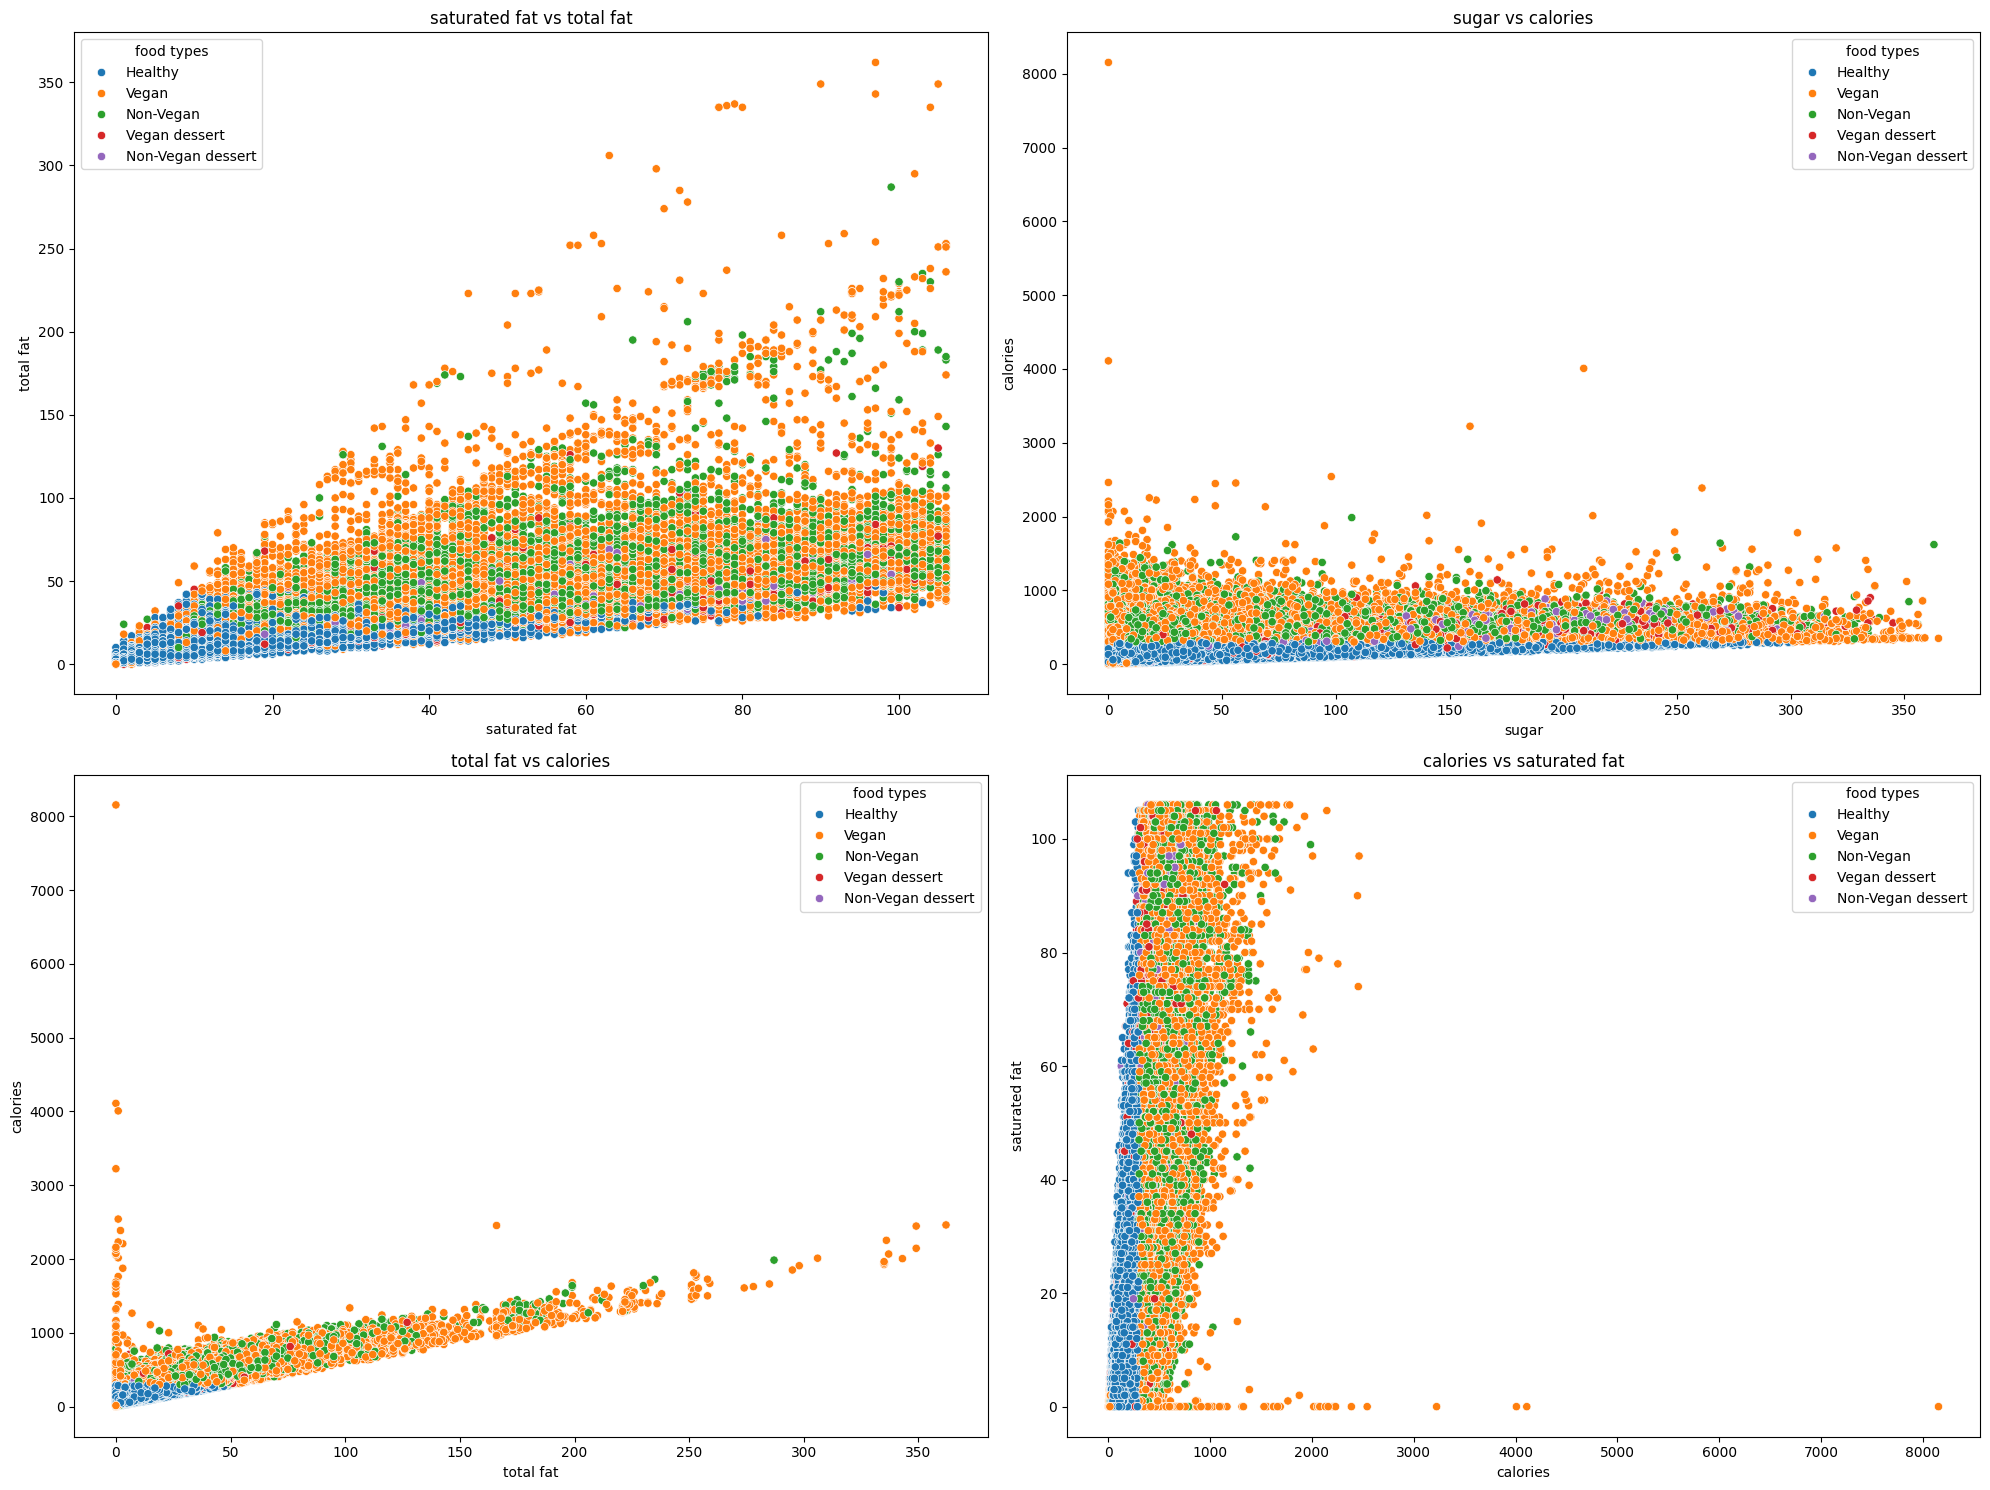

In [35]:
fig, ax = plt.subplots(2, 2, figsize=(20, 15))

scatterplot('saturated fat', 'total fat', ax[0, 0])
scatterplot('sugar', 'calories', ax[0, 1])
scatterplot('total fat', 'calories', ax[1, 0])
scatterplot('calories', 'saturated fat', ax[1, 1])

plt.tight_layout()
plt.show()

Insights:
1. As indicated above, saturated fat and total fat exhibits a strong linear relationship.
2. Food types classified as healthy have lower fat and calorie content compared to other food types.

### ==============Still Working on it============================

In [59]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
prep_data=scaler.fit_transform(df.iloc[:, 6:13].to_numpy())

### Modelling

In [24]:
neigh = NearestNeighbors(metric='cosine',algorithm='brute')
neigh.fit(prep_data)

NearestNeighbors(algorithm='brute', metric='cosine')

In [25]:
transformer = FunctionTransformer(neigh.kneighbors,kw_args={'return_distance':False})
pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])

In [26]:
params={'n_neighbors':10,'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 10,
                                              'return_distance': False}))])

In [29]:
pipeline.transform(df.iloc[0:1,6:13].to_numpy())[0]

array([     0,  76251,  85174, 225263, 127798, 202705,   2965, 202440,
       228829, 123567])

In [30]:
df.iloc[pipeline.transform(df.iloc[0:1,6:13].to_numpy())[0]]

,name,minutes,tags,n_steps,steps,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,arriba baked winter squash mexican style,55,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
76251,easy cucumber tomato and onion salad,15,"['15-minutes-or-less', 'time-to-make', 'main-i...",4,"['place cut up veggies in glass bowl', 'mix re...","['cucumbers', 'tomatoes', 'onion', 'splenda gr...",7,51.6,0.0,13.0,0.0,2.0,0.0,2.0
85174,flourless no added sugar oatmeal banana raisi...,20,"['30-minutes-or-less', 'time-to-make', 'course...",3,['drop in rounded tablespoons on a parchment c...,"['bananas', 'unsweetened applesauce', 'rolled ...",7,49.9,0.0,15.0,0.0,2.0,0.0,3.0
225263,weight watchers no bake chocolate oatmeal cookies,13,"['15-minutes-or-less', 'time-to-make', 'course...",7,"['bring margarine , milk , splenda , and cocoa...","['light margarine', 'skim milk', 'splenda suga...",7,47.7,0.0,12.0,0.0,2.0,0.0,3.0
127798,ma s secret jamaican banana fritters,30,"['30-minutes-or-less', 'time-to-make', 'course...",10,"['peel bananas and place into a large bowl', '...","['bananas', 'flour', 'milk', 'brown sugar', 'v...",7,45.8,0.0,11.0,0.0,2.0,0.0,3.0
202705,sugar free jalapeno jelly with truvia,100,"['time-to-make', 'course', 'main-ingredient', ...",34,"['wash and sterilize 12 - 8oz', 'canning jars'...","['fresh jalapenos', 'green bell pepper', 'red ...",7,61.3,0.0,13.0,0.0,2.0,0.0,4.0
2965,aji colombian salsa,10,"['15-minutes-or-less', 'time-to-make', 'course...",1,"['combine all ingredients , cover , and let si...","['fresh lemon juice', 'white vinegar', 'water'...",7,39.1,0.0,13.0,0.0,2.0,0.0,2.0
202440,substitute for 1 envelope onion soup mix,2,"['15-minutes-or-less', 'time-to-make', 'course...",2,"['stir together', 'use as a substitute for 1 e...","['dried onion flakes', 'low-sodium beef bouill...",7,53.8,0.0,21.0,0.0,2.0,0.0,4.0
228829,ww vanilla biscuits cookies,30,"['30-minutes-or-less', 'time-to-make', 'course...",12,"['preheat oven to 180 deg c', 'line 2 trays wi...","['self raising flour', 'custard powder', 'cast...",7,53.3,1.0,17.0,0.0,2.0,0.0,3.0
123567,light and healthy cookies,21,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['turn on the oven to 180c', 'in a large mixin...","['egg whites', 'superfine sugar', 'crispy rice...",7,48.0,0.0,21.0,1.0,2.0,0.0,3.0


In [33]:
def scaling(dataframe):
    scaler=StandardScaler()
    prep_data=scaler.fit_transform(dataframe.iloc[:,6:13].to_numpy())
    return prep_data,scaler

def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine',algorithm='brute')
    neigh.fit(prep_data)
    return neigh

def build_pipeline(neigh,scaler,params):
    transformer = FunctionTransformer(neigh.kneighbors,kw_args=params)
    pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])
    return pipeline

def extract_data(dataframe,ingredient_filter,max_nutritional_values):
    extracted_data=dataframe.copy()
    for column,maximum in zip(extracted_data.columns[6:15],max_nutritional_values):
        extracted_data=extracted_data[extracted_data[column]<maximum]
    if ingredient_filter!=None:
        for ingredient in ingredient_filter:
            extracted_data=extracted_data[extracted_data['RecipeIngredientParts'].str.contains(ingredient,regex=False)] 
    return extracted_data

def apply_pipeline(pipeline,_input,extracted_data):
    return extracted_data.iloc[pipeline.transform(_input)[0]]

def recommand(dataframe,_input,max_nutritional_values,ingredient_filter=None,params={'return_distance':False}):
    extracted_data=extract_data(dataframe,ingredient_filter,max_nutritional_values)
    prep_data,scaler=scaling(extracted_data)
    neigh=nn_predictor(prep_data)
    pipeline=build_pipeline(neigh,scaler,params)
    return apply_pipeline(pipeline,_input,extracted_data)

In [35]:
max_Calories=2000
max_daily_fat=100
max_daily_Saturatedfat=13
max_daily_Cholesterol=300
max_daily_Sodium=2300
max_daily_Carbohydrate=325
max_daily_Fiber=40
# max_daily_Sugar=40
# max_daily_Protein=200
max_list=[max_Calories,max_daily_fat,max_daily_Saturatedfat,max_daily_Cholesterol,max_daily_Sodium,max_daily_Carbohydrate,max_daily_Fiber]

In [36]:
test_input=df.iloc[0:1,6:13].to_numpy()
recommand(df,test_input,max_list)

,name,minutes,tags,n_steps,steps,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,arriba baked winter squash mexican style,55,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...","['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,4.0
76251,easy cucumber tomato and onion salad,15,"['15-minutes-or-less', 'time-to-make', 'main-i...",4,"['place cut up veggies in glass bowl', 'mix re...","['cucumbers', 'tomatoes', 'onion', 'splenda gr...",7,51.6,0.0,13.0,0.0,2.0,0.0,2.0
85174,flourless no added sugar oatmeal banana raisi...,20,"['30-minutes-or-less', 'time-to-make', 'course...",3,['drop in rounded tablespoons on a parchment c...,"['bananas', 'unsweetened applesauce', 'rolled ...",7,49.9,0.0,15.0,0.0,2.0,0.0,3.0
225263,weight watchers no bake chocolate oatmeal cookies,13,"['15-minutes-or-less', 'time-to-make', 'course...",7,"['bring margarine , milk , splenda , and cocoa...","['light margarine', 'skim milk', 'splenda suga...",7,47.7,0.0,12.0,0.0,2.0,0.0,3.0
127798,ma s secret jamaican banana fritters,30,"['30-minutes-or-less', 'time-to-make', 'course...",10,"['peel bananas and place into a large bowl', '...","['bananas', 'flour', 'milk', 'brown sugar', 'v...",7,45.8,0.0,11.0,0.0,2.0,0.0,3.0


In [38]:
def recommend_by_calories(dataframe, max_daily_fat, max_nutritional_values, ingredient_filter=None, params={'return_distance':False}):
    # Extract data based on maximum nutritional values and ingredient filter
    extracted_data = extract_data(dataframe, ingredient_filter, max_nutritional_values)
    
    # Scale the data
    prep_data, scaler = scaling(extracted_data)
    
    # Fit the Nearest Neighbors model
    neigh = nn_predictor(prep_data)
    
    # Build the pipeline
    pipeline = build_pipeline(neigh, scaler, params)
    
    # Create a test input with specified calories
    test_input = np.array([[0] * 7])  # Assuming the input shape is (1, 9) for 9 nutritional features
    test_input[0, 1] = max_daily_fat  # Set the calories
    
    # Get recipe recommendation based on test input
    recommended_recipe = apply_pipeline(pipeline, test_input, extracted_data)
    
    return recommended_recipe

# Example usage
recommended_recipe = recommend_by_calories(df, 100, max_list)

In [39]:
recommended_recipe.head(5)

,name,minutes,tags,n_steps,steps,ingredients,n_ingredients,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
30892,bubble tea from bubbleteasupply com,65,"['weeknight', 'time-to-make', 'course', 'cuisi...",8,"['the ratio should be a minimum of 6:1 , water...","['tapioca', 'water']",2,90.7,0.0,3.0,0.0,0.0,0.0,7.0
138727,momma s quickie cocktail,5,"['15-minutes-or-less', 'time-to-make', 'course...",6,"['fill a tall glass with ice', 'pour ingredien...","['blood orange italian soda', 'rum']",2,96.3,0.0,0.0,0.0,0.0,0.0,0.0
614,nilla wafer martini,3,"['15-minutes-or-less', 'time-to-make', 'course...",3,['pour ingredients into cocktail shaker with i...,"['amaretto', 'vanilla vodka']",2,96.3,0.0,0.0,0.0,0.0,0.0,0.0
160250,pineapple martini,2,"['15-minutes-or-less', 'time-to-make', 'course...",2,"['combine in a mixing glass with ice', 'stir a...","['pineapple liqueur', 'absolut mandarin vodka']",2,96.3,0.0,0.0,0.0,0.0,0.0,0.0
77537,easy peasy cold buttered rum milkshake,5,"['15-minutes-or-less', 'time-to-make', 'course...",3,['combine ingredients in the container of an e...,"['butter pecan ice cream', 'dark rum']",2,97.9,0.0,0.0,0.0,0.0,0.0,0.0
